In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\insurance.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# EDA

In [4]:
df.shape

(1000, 40)

In [5]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [6]:
#classifaction problem

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
#drop column c39

In [9]:
df.drop(columns=['_c39'],inplace=True)

In [10]:
df.shape

(1000, 39)

In [11]:
#no null values

In [12]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [13]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [14]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [15]:
catg=df.select_dtypes('object')
cont=df.select_dtypes('number')

In [16]:
catg.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [17]:
catg.shape

(1000, 21)

In [18]:
# data visulzation

<AxesSubplot:xlabel='policy_state', ylabel='count'>

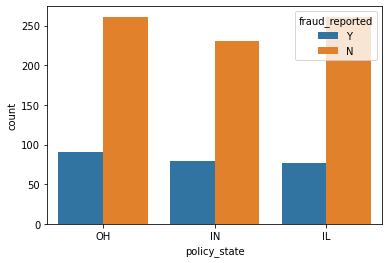

In [19]:
sns.countplot(df['policy_state'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

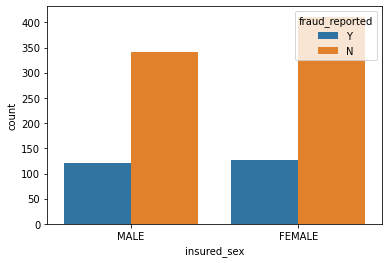

In [20]:
sns.countplot(df['insured_sex'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

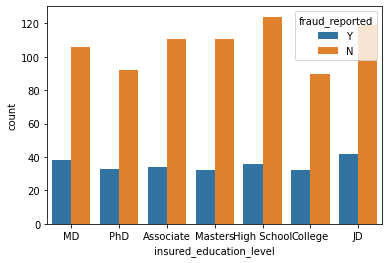

In [21]:
sns.countplot(df['insured_education_level'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

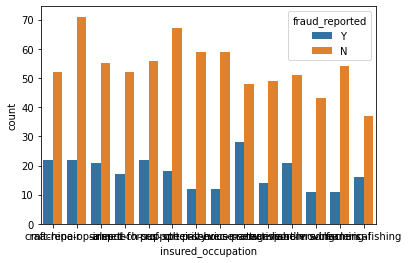

In [22]:
sns.countplot(df['insured_occupation'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

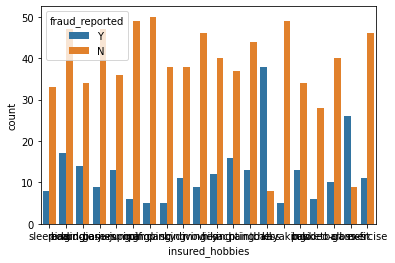

In [23]:
sns.countplot(df['insured_hobbies'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

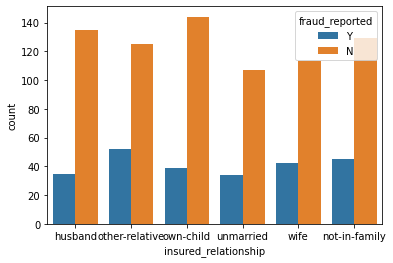

In [24]:
sns.countplot(df['insured_relationship'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

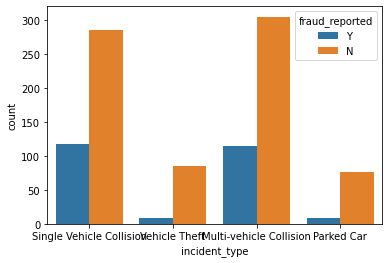

In [25]:
sns.countplot(df['incident_type'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

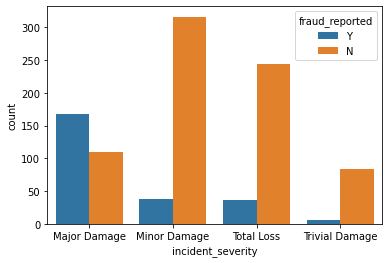

In [26]:
sns.countplot(df['incident_severity'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

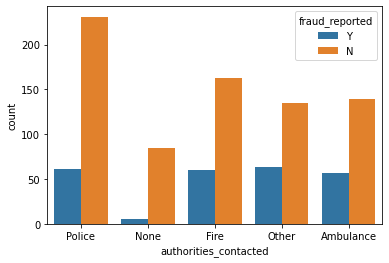

In [27]:
sns.countplot(df['authorities_contacted'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_state', ylabel='count'>

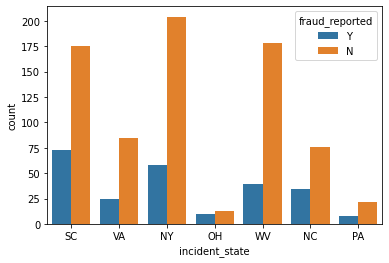

In [28]:
sns.countplot(df['incident_state'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_city', ylabel='count'>

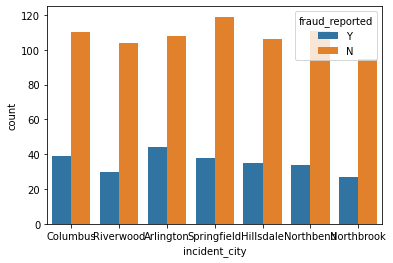

In [29]:
sns.countplot(df['incident_city'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_location', ylabel='count'>

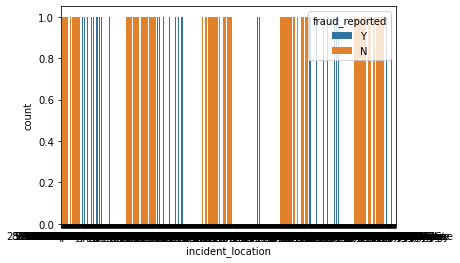

In [30]:
sns.countplot(df['incident_location'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

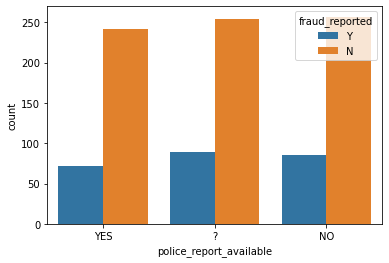

In [31]:
sns.countplot(df['police_report_available'],hue='fraud_reported',data=df)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

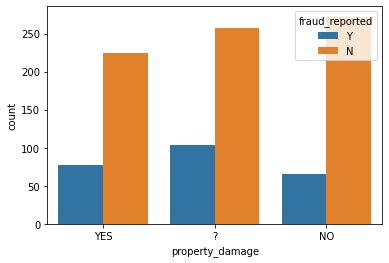

In [32]:
sns.countplot(df['property_damage'],hue='fraud_reported',data=df)

In [33]:
cont.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [34]:
cont.shape

(1000, 18)

<AxesSubplot:xlabel='incident_state', ylabel='vehicle_claim'>

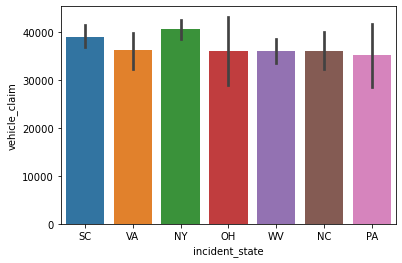

In [35]:
sns.barplot(data=df,x='incident_state',y='vehicle_claim')

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='police_report_available'>

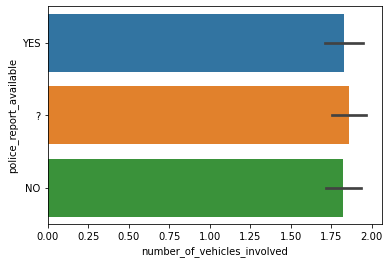

In [36]:
sns.barplot(data=df,x='number_of_vehicles_involved',y='police_report_available')

<AxesSubplot:xlabel='insured_education_level', ylabel='policy_number'>

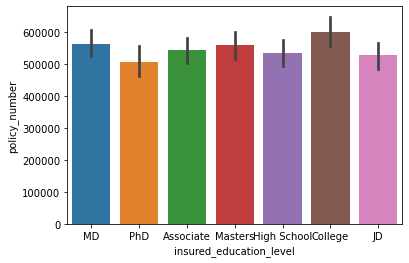

In [37]:
sns.barplot(data=df,x='insured_education_level',y='policy_number')

<AxesSubplot:xlabel='age', ylabel='insured_sex'>

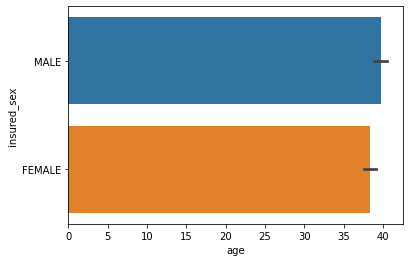

In [38]:
sns.barplot(data=df,x='age',y='insured_sex')

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_number'>

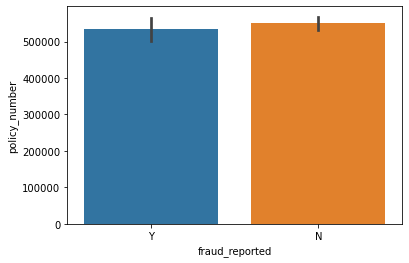

In [39]:
sns.barplot(data=df,x='fraud_reported',y='policy_number')

<AxesSubplot:xlabel='months_as_customer', ylabel='age'>

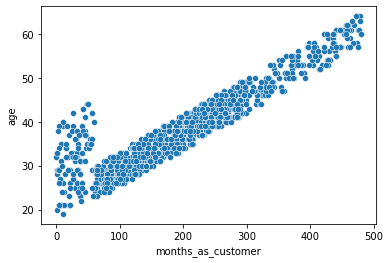

In [40]:
sns.scatterplot(data=df,x='months_as_customer',y='age')

<AxesSubplot:xlabel='policy_number', ylabel='age'>

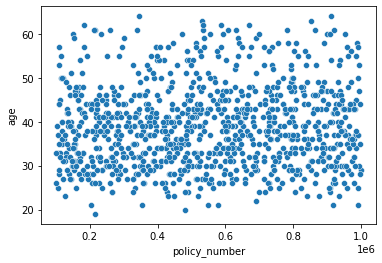

In [41]:
sns.scatterplot(data=df,x='policy_number',y='age')

<AxesSubplot:xlabel='policy_number', ylabel='policy_annual_premium'>

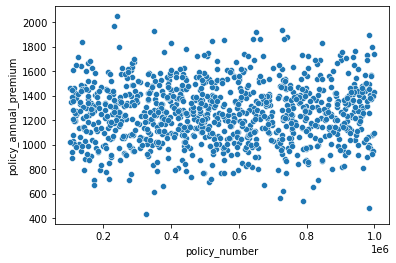

In [42]:
sns.scatterplot(data=df,x='policy_number',y='policy_annual_premium')

<AxesSubplot:xlabel='capital-gains', ylabel='capital-loss'>

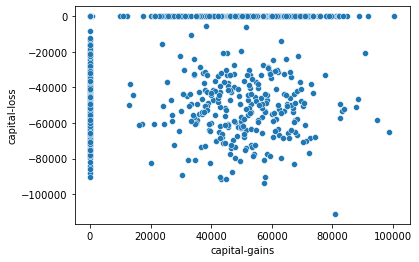

In [43]:
sns.scatterplot(data=df,x='capital-gains',y='capital-loss')

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

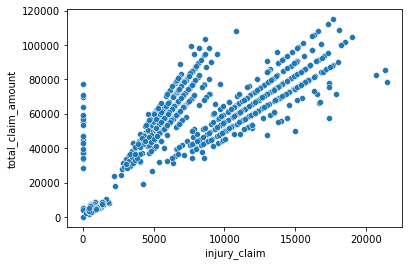

In [44]:
sns.scatterplot(data=df,x='injury_claim',y='total_claim_amount')

<AxesSubplot:xlabel='bodily_injuries', ylabel='injury_claim'>

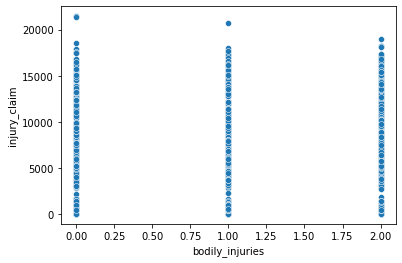

In [45]:
sns.scatterplot(data=df,x='bodily_injuries',y='injury_claim')

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='vehicle_claim'>

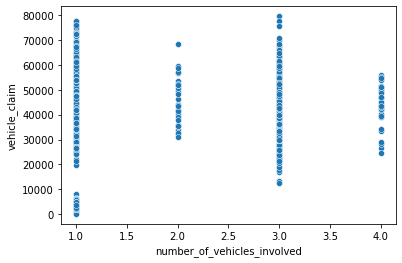

In [46]:
sns.scatterplot(data=df,x='number_of_vehicles_involved',y='vehicle_claim')

In [47]:
#some columns are categorical 

In [48]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [51]:
df.dtypes

months_as_customer             int64
age                            int64
policy_number                  int64
policy_bind_date               int32
policy_state                   int32
policy_csl                     int32
policy_deductable              int64
policy_annual_premium          int64
umbrella_limit                 int64
insured_zip                    int64
insured_sex                    int32
insured_education_level        int32
insured_occupation             int32
insured_hobbies                int32
insured_relationship           int32
capital-gains                  int64
capital-loss                   int64
incident_date                  int32
incident_type                  int32
collision_type                 int32
incident_severity              int32
authorities_contacted          int32
incident_state                 int32
incident_city                  int32
incident_location              int32
incident_hour_of_the_day       int64
number_of_vehicles_involved    int64
p

In [52]:
#so convert numerical

In [53]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,184.283000,19.948000,499.500000,474.332000,1.01400,0.951000,0.965000,495.735000,1.900000,496.321000,...,1.487000,0.971000,368.330000,289.050000,287.730000,347.164000,6.546000,19.318000,10.103000,0.247000
std,99.894954,9.140287,288.819436,275.402851,0.83096,0.804516,0.805247,285.876467,1.917205,287.276417,...,1.111335,0.810442,218.145411,189.104368,182.969481,209.404851,4.034869,11.136107,6.015861,0.431483
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.750000,13.000000,249.750000,233.750000,0.00000,0.000000,0.000000,247.750000,1.000000,247.750000,...,1.000000,0.000000,183.750000,123.750000,127.750000,163.750000,3.000000,10.000000,5.000000,0.000000
50%,185.500000,19.000000,499.500000,472.500000,1.00000,1.000000,1.000000,496.500000,1.000000,496.500000,...,1.000000,1.000000,372.500000,276.500000,281.000000,351.500000,7.000000,20.000000,10.000000,0.000000
75%,257.250000,25.000000,749.250000,713.250000,2.00000,2.000000,2.000000,742.250000,1.000000,744.250000,...,2.000000,2.000000,548.250000,455.250000,446.250000,523.250000,10.000000,29.000000,15.000000,0.000000
max,390.000000,45.000000,999.000000,950.000000,2.00000,2.000000,2.000000,990.000000,10.000000,994.000000,...,3.000000,2.000000,762.000000,637.000000,625.000000,725.000000,13.000000,38.000000,20.000000,1.000000


In [54]:
x=df.drop(columns=['fraud_reported'],axis=1)
y=df['fraud_reported']

In [55]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [56]:
!pip install imbalanced-learn==0.6.0

In [57]:
!pip install scikit-learn==0.22.1

  Using cached scikit_learn-0.22.1-cp38-cp38-win_amd64.whl (6.4 MB)

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:


In [58]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y = SM.fit_resample(x,y)

In [59]:
# co relation columns

In [60]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [61]:
corr = df.corr()
corr

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.911296,0.059023,0.053206,-0.000783,-0.026295,0.016873,0.014294,0.017145,0.015904,...,0.057284,0.020082,0.055934,0.064041,0.029788,0.052742,0.044443,0.001095,0.002020,0.017095
age,0.911296,1.000000,0.061380,0.056538,-0.014533,-0.015185,0.020561,0.017822,0.021924,0.013517,...,0.052359,0.014661,0.071265,0.075124,0.060450,0.059784,0.030410,0.017343,0.001354,0.012143
policy_number,0.059023,0.061380,1.000000,0.045938,0.073149,0.038834,-0.015075,0.018033,0.013341,-0.000690,...,-0.013730,0.032358,-0.009532,-0.012413,-0.003358,-0.014299,0.024663,0.064259,0.000465,-0.030222
policy_bind_date,0.053206,0.056538,0.045938,1.000000,0.015289,0.008486,-0.016906,-0.032003,-0.024888,-0.032670,...,-0.007004,-0.034920,0.009868,0.026021,0.016972,0.009028,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000783,-0.014533,0.073149,0.015289,1.000000,0.001027,0.008213,0.014751,-0.031793,0.025074,...,0.022960,0.071950,-0.015990,-0.042685,0.009282,-0.007492,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026295,-0.015185,0.038834,0.008486,0.001027,1.000000,0.001986,0.017161,0.022779,0.006474,...,0.071500,0.002424,-0.043541,-0.076419,-0.041428,-0.027320,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.016873,0.020561,-0.015075,-0.016906,0.008213,0.001986,1.000000,0.003182,0.009402,-0.004227,...,0.074994,0.030654,0.020877,0.028482,0.058976,0.004261,-0.030775,-0.003892,0.024921,0.007620
policy_annual_premium,0.014294,0.017822,0.018033,-0.032003,0.014751,0.017161,0.003182,1.000000,-0.003712,0.043082,...,0.012004,0.014816,-0.001025,-0.021839,-0.006593,0.009413,0.007216,-0.030185,-0.031015,-0.015261
umbrella_limit,0.017145,0.021924,0.013341,-0.024888,-0.031793,0.022779,0.009402,-0.003712,1.000000,0.010062,...,-0.005779,-0.055340,-0.036495,-0.048003,-0.018668,-0.031991,-0.007169,0.042421,0.010528,0.057719
insured_zip,0.015904,0.013517,-0.000690,-0.032670,0.025074,0.006474,-0.004227,0.043082,0.010062,1.000000,...,0.022141,-0.041368,-0.005345,-0.005417,-0.014892,-0.017019,-0.028966,0.029470,-0.027803,0.061767


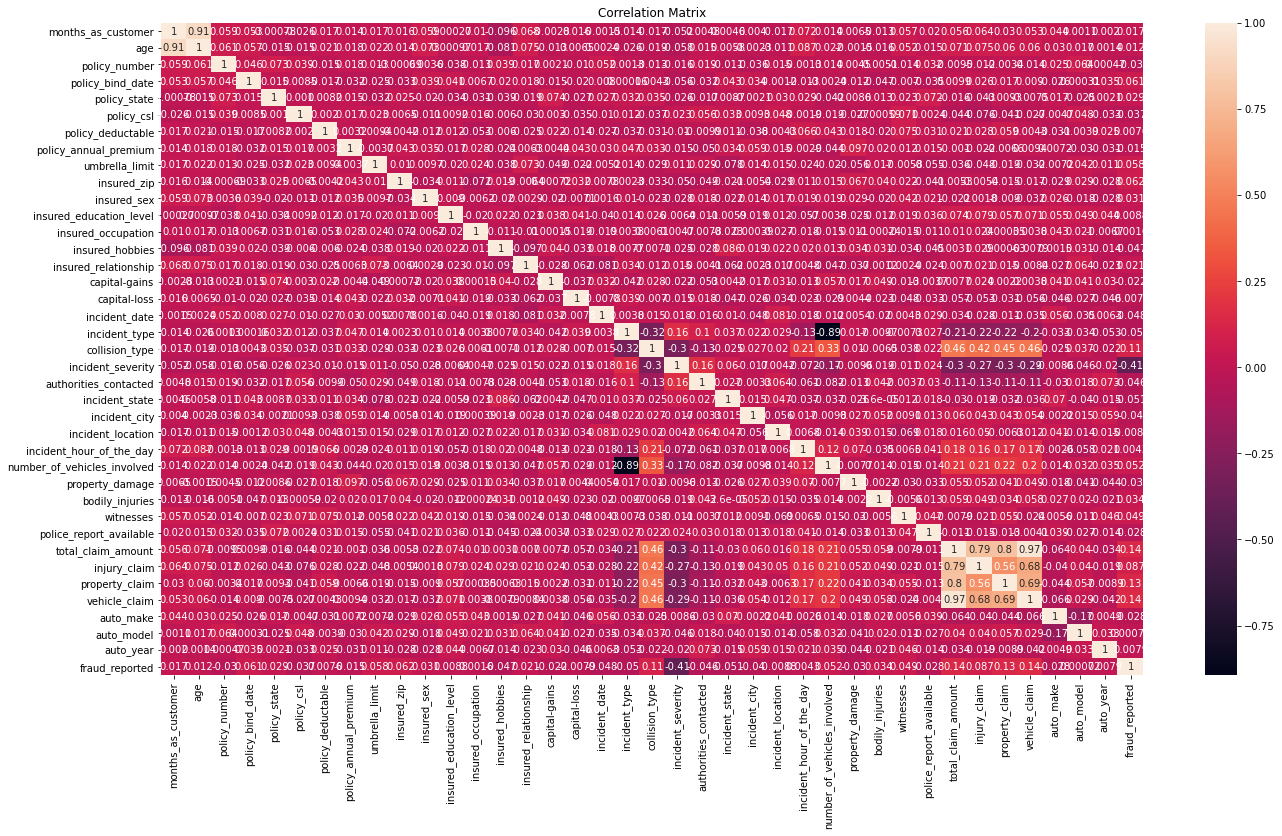

In [62]:
plt.figure(figsize=[22,12])
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [63]:
corr_mat = df.corr()
corr_mat['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.144769
total_claim_amount             0.140553
property_claim                 0.133952
collision_type                 0.110130
injury_claim                   0.086889
insured_zip                    0.061767
policy_bind_date               0.060642
umbrella_limit                 0.057719
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.017095
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
policy_deductable              0.007620
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
capital-loss                  -0.007930
incident_location             -0.008832


In [64]:
# box plot

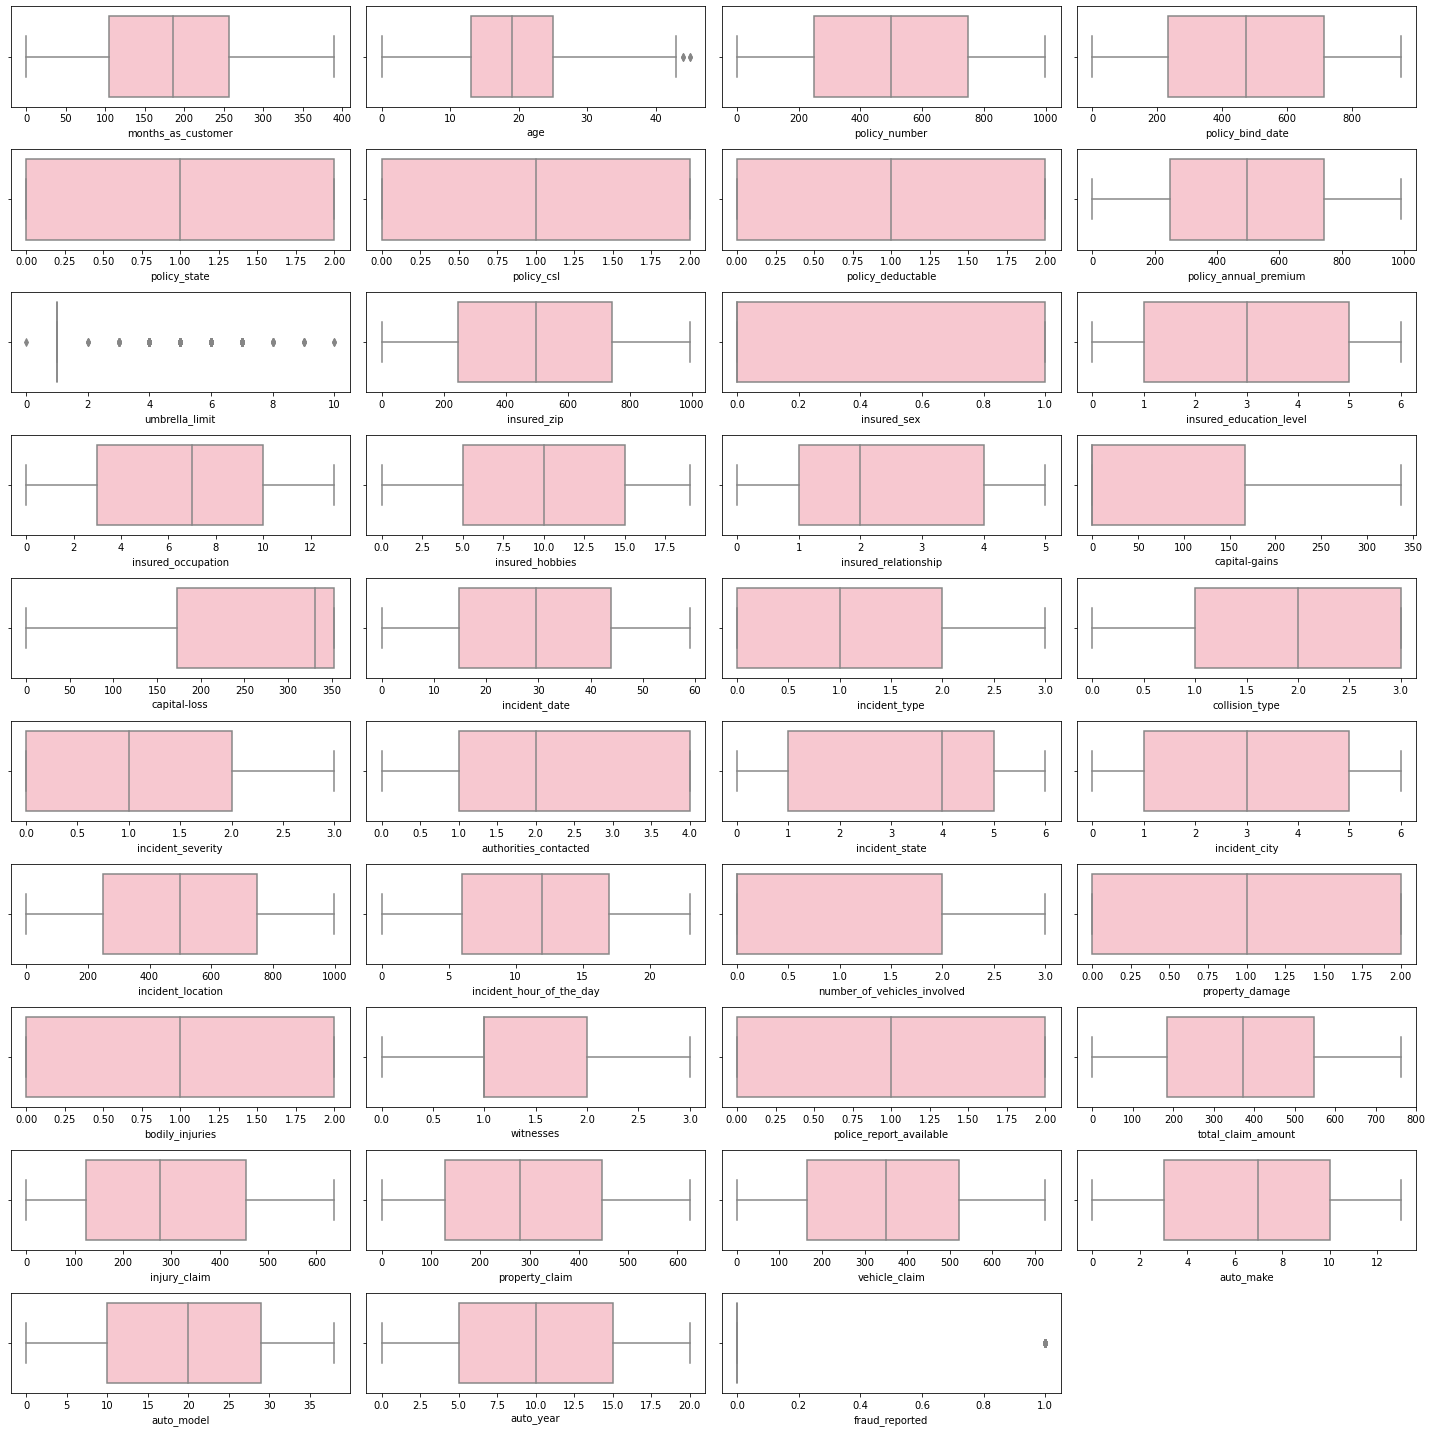

In [65]:
collist=df.columns.values
ncol=4
nrows=10
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='pink')
    plt.tight_layout()

In [66]:
dfCountCols = df[['age','umbrella_limit']]

In [67]:
from scipy.stats import zscore
z = np.abs(zscore(dfCountCols))
df_new=df[(z<3).all(axis=1)]

In [68]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0])


shape before and after
shape before         : (1000, 39)
shape after          : (985, 39)
Percentage Loss      : 0.015


In [69]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [70]:
dfCountCols = df[['age','umbrella_limit']]

In [71]:
Q1 = dfCountCols.quantile(0.25)
Q3 = dfCountCols.quantile(0.75)
IQR = Q3 - Q1
df_new1 = df[~((dfCountCols < (Q1 - 1.5 * IQR)) |(dfCountCols > (Q3 + 1.5 * IQR))).any(axis=1)]


In [72]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new1.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new1.shape[0])/df.shape[0])


shape before and after
shape before         : (1000, 39)
shape after          : (795, 39)
Percentage Loss      : 0.205


In [73]:
df.skew()

months_as_customer             0.092231
age                            0.478988
policy_number                  0.000000
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.063505
policy_annual_premium         -0.004022
umbrella_limit                 1.936066
insured_zip                    0.001683
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.894996
capital-loss                  -0.810352
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [74]:
features = ['age','umbrella_limit','capital-gains','capital-loss']

In [75]:
from sklearn.preprocessing import power_transform
df[features]=power_transform(df[features],method="yeo-johnson")


In [76]:
x = df.drop(columns=['fraud_reported'],axis=1)
y = df['fraud_reported']

In [77]:
dummy=pd.DataFrame(x)
dummy.skew()

months_as_customer             0.092231
age                           -0.027267
policy_number                  0.000000
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.063505
policy_annual_premium         -0.004022
umbrella_limit                -0.370613
insured_zip                    0.001683
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.130054
capital-loss                  -0.623731
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [78]:
#remove skewness

In [79]:
# data cleaning complete

In [80]:
#used ml models

In [81]:
x = df.drop(columns=['fraud_reported'],axis=1)
y = df['fraud_reported']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score

In [83]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.80,random_state=i)
    mod = RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.795 on Random_state 87


In [85]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.80,random_state=maxRS)

In [86]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()
ad = AdaBoostClassifier()


In [87]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

accuracy_score 0.71375
confusion_matrix [[477 139]
 [ 90  94]]
classification_report               precision    recall  f1-score   support

           0       0.84      0.77      0.81       616
           1       0.40      0.51      0.45       184

    accuracy                           0.71       800
   macro avg       0.62      0.64      0.63       800
weighted avg       0.74      0.71      0.72       800



In [88]:
roc_auc_score(y_test,lr.predict(x_test))

0.6426101072840203

In [89]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

accuracy_score 0.71
confusion_matrix [[531  85]
 [147  37]]
classification_report               precision    recall  f1-score   support

           0       0.78      0.86      0.82       616
           1       0.30      0.20      0.24       184

    accuracy                           0.71       800
   macro avg       0.54      0.53      0.53       800
weighted avg       0.67      0.71      0.69       800



In [90]:
roc_auc_score(y_test,kn.predict(x_test))

0.5315499717673632

In [91]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.805
confusion_matrix [[581  35]
 [121  63]]
classification_report               precision    recall  f1-score   support

           0       0.83      0.94      0.88       616
           1       0.64      0.34      0.45       184

    accuracy                           0.81       800
   macro avg       0.74      0.64      0.66       800
weighted avg       0.79      0.81      0.78       800



In [92]:
roc_auc_score(y_test,rf.predict(x_test))

0.6427865612648221

In [93]:
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.765
confusion_matrix [[519  97]
 [ 91  93]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.84      0.85       616
           1       0.49      0.51      0.50       184

    accuracy                           0.77       800
   macro avg       0.67      0.67      0.67       800
weighted avg       0.77      0.77      0.77       800



In [94]:
roc_auc_score(y_test,ad.predict(x_test))

0.6739836250705816

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.743


In [97]:
print(cross_val_score(kn,x,y,cv=5).mean())

0.7180000000000001


In [98]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.765


In [99]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.795


In [100]:
# best model is rf

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = {'criterion':['gini','entropy'],
              'n_estimators':[3,6,9,12,15,18,20,35,38],
              'max_depth':[2,4,5,6,8,10,9,18,28,39,],
              'min_samples_split':[3,11,15,16,19,20,21,28,42,45]}

gridsearch = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)
              

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 8, 10, 9, 18, 28, 39],
                         'min_samples_split': [3, 11, 15, 16, 19, 20, 21, 28,
                                               42, 45],
                         'n_estimators': [3, 6, 9, 12, 15, 18, 20, 35, 38]})

In [103]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 28,
 'min_samples_split': 3,
 'n_estimators': 3}

In [104]:
mod = RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_split=19,n_estimators=9)
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc*100)

78.125


In [105]:
#save the model

In [107]:
import joblib
joblib.dump(mod,'insurance.pkl')

['insurance.pkl']